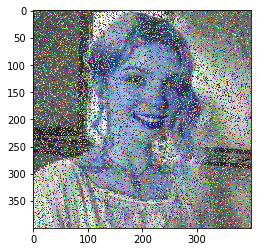

In [271]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint, random

class ImageProcessing:
    
    def __init__(self, img = ""): # Initialisation d'image
        self.image = cv2.imread(img, cv2.IMREAD_UNCHANGED) # Lire l'image sans appliquer des changements
        self.image = self.image / 255 # changer les valeurs des pixels entre 0 et 1
        
    def luminosity(self, value=100): # Changer la luminosité d'image
        self.image = self.image * (value/100)
    
    def scale(self, value=1): # Agrandir/Réduire l'image
        width = int(self.image.shape[1] * value) # prendre la largeur originale et multiplier avec le scale
        height = int(self.image.shape[0] * value)
        self.image = cv2.resize(self.image, (width, height), interpolation = cv2.INTER_AREA)
        
    def resize(self, width=None, height=None): # Redimensionner l'image
        if width is None : width = self.image.shape[1]
        if height is None : height = self.image.shape[0]
        self.image = cv2.resize(self.image, (width, height), interpolation = cv2.INTER_AREA)
        
    def changeColor(self, color='red', degre=100): # Chnager la coleur dimage
        temp = self.image # créer une copie de l'image
        i = 0 # indices pour indiquer la position de pixel
        for ligne in temp: # pour chaque ligne de pixels
            j = 0 # déplacer le curseur vers le début de la ligne
            for pixel in ligne: # pour chaque pixel (3*3) la ligne
                if color == 'red' : temp[i][j][0] *= degre / 100
                if color == 'green' : temp[i][j][1] *= degre / 100
                if color == 'blue'  : temp[i][j][2] *= degre / 100
                j += 1
            i += 1
            
        self.image = temp # Appliquer les changements
    
    def inverse(self): #Appliquer un filtre pass haut
        ones = np.ones((self.image.shape[1], self.image.shape[0], 3)) # générer une matrices des 1 relative à l'image
        self.image = ones - self.image # inversé les pixels 

    def addMask(self, mask = [1, 0, 0]): # Ajouter un masque
        i = 0
        for ligne in self.image: # pour chaque ligne de pixels
            j = 0 # déplacer le curseur vers le début de la ligne
            for pixel in ligne: # pour chaque pixel (3*3) la ligne
                self.image[i][j] *= mask
                j+=1
            i+=1
        
    def noise(self, degre=1, color='rand'): # Ajouter de bruit
        c = 1 # couleur blanche
        if color == 'black' : c = 0 # chnager la couleur de bruit selon le choix
        for i in range(0, int(degre*10000)):
            rand_ligne = randint(0, self.image.shape[0]-1)
            rand_pixel = randint(0, self.image.shape[1]-1)
            if color != 'rand' :
                self.image[rand_ligne][rand_pixel] = [c, c, c] # Colorer ce pixel en blanc
            else :
                self.image[rand_ligne][rand_pixel] = [random(), random(), random()] # Colorer ce pixel en blanc

    def show(self): # Afficher l'image en utilisant PyPlot de matplotlib
        plt.imshow(self.image)
        
    def showMatrix(self): # Afficher l'image sous forme d'une matrice
        print(self.image)
        
    def save(self, path): # Enregistrer l'image de sortie dans un fichier
        cv2.imwrite(path, self.image * 255)
        
        
'''
    Les méthode à appliquer sont : 
        - luminosity(value=100) : Pour changer la luminosité, la valeur est en pourcentage %
        - scale(value=1) : Pour Agrendir ou réduire la taille de l'image (value fois)
        - resize(width=None, height=None) : Redimensionner l'image avec la taille donnée
        - changeColor(color='red', degre=100) : Changer change l'une des couleurs de base (red, green, blue), degré en %
        - noise(degre=1, color='rand') : Ajouter de bruit, les couleurs disponible sont rand(pour aléatoire), white, black
        - inverse() # Inverser les couleurs de l'image
        - ip.addMask(mask=[1, 0, 0]) # Ajouter un mask de couleur ex : [0, 0, 1] pour le bleu
        - show() : Pour afficher l'image
        - showMatrix() : Pour afficher l'image sous format d'une matrice à 3 dimension (channel de couleur 3)
        - save(path='saved.jpg') : Enregistrer l'image, fichier par défaut est saved.jpg
'''
ip = ImageProcessing("sample.jpg")

#ip.luminosity(200) # en pourcentage
#ip.scale(2) # agrendir/minimiser n fois
#ip.resize(1024, 400) # redimensionner l'image
#ip.changeColor('red', 200) # changer la degré les couleurs de base
#ip.noise(7) # ajouter de bruit
#ip.inverse() # inverser les couleurs
#ip.addMask([1, 0.9, 0.1]) # Ajouter un mask en jaune d'Or

ip.show()
#ip.save("c:/users/hbaza/Desktop/image.jpg")